# Comprehensive ML Model Training for Airbnb Price Prediction

This notebook trains multiple machine learning and deep learning models for predicting Airbnb prices in Bali.

## Models to be trained:
### Traditional ML Models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Support Vector Regression (SVR)
5. Decision Tree Regressor
6. K-Nearest Neighbors (KNN)

### Ensemble Models:
1. Random Forest
2. Gradient Boosting
3. XGBoost
4. LightGBM
5. CatBoost
6. Extra Trees

### Deep Learning Models:
1. Multi-layer Perceptron (MLP)
2. Deep Neural Network with Dropout
3. CNN-inspired 1D model

All models will be saved in organized folders for easy integration with the dashboard.

## 1. Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Traditional ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Ensemble Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
import lightgbm as lgb
try:
    import catboost as cb
except ImportError:
    print("CatBoost not installed. Installing...")
    import subprocess
    subprocess.check_call(["pip", "install", "catboost"])
    import catboost as cb

# Deep Learning
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, GlobalMaxPooling1D
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
except ImportError:
    print("TensorFlow not installed. Installing...")
    import subprocess
    subprocess.check_call(["pip", "install", "tensorflow"])
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, GlobalMaxPooling1D
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model persistence
import joblib
import pickle
import json
import os
from datetime import datetime

# Display settings
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")

CatBoost not installed. Installing...
All libraries imported successfully!
TensorFlow version: 2.18.0
XGBoost version: 2.1.2
LightGBM version: 4.6.0
All libraries imported successfully!
TensorFlow version: 2.18.0
XGBoost version: 2.1.2
LightGBM version: 4.6.0


In [2]:
import platform, numpy
print(platform.architecture())
print(numpy.__version__)

('64bit', 'WindowsPE')
2.3.4


## 2. Load and Explore Data

In [3]:
# Define paths
BASE_DIR = r"c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard"
DATA_PATH = os.path.join(BASE_DIR, "dataset", "airbnb_bali_ml_ready.csv")
MODEL_BASE_PATH = os.path.join(BASE_DIR, "ml_models")

print(f"Loading data from: {DATA_PATH}")
print(f"Models will be saved to: {MODEL_BASE_PATH}")

# Load the dataset
df = pd.read_csv(DATA_PATH)

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()

print(f"\nFirst 5 rows:")
df.head()

Loading data from: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\dataset\airbnb_bali_ml_ready.csv
Models will be saved to: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models
Dataset shape: (833, 16)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_id                833 non-null    int64  
 1   stay_duration          833 non-null    int64  
 2   check_in_month         833 non-null    int64  
 3   check_in_day_of_week   833 non-null    int64  
 4   season                 833 non-null    object 
 5   is_weekend             833 non-null    int64  
 6   locale                 833 non-null    object 
 7   currency               833 non-null    ob

,room_id,stay_duration,check_in_month,check_in_day_of_week,season,is_weekend,locale,currency,price,check_in_date,check_out_date,check_in_year,check_in_week_of_year,full_url,data_extraction_date,analysis_version
0,22392464,5,1,4,Winter,0,en-US,USD,113.90,2026-01-09,2026-01-14,2026,2,https://www.airbnb.com/rooms/22392464?locale=e...,2025-11-13,1.0
1,1105613914536650718,5,11,4,Fall,0,en-US,USD,68.03,2025-11-14,2025-11-19,2025,46,https://www.airbnb.com/rooms/11056139145366507...,2025-11-13,1.0
2,1195317768031433401,5,12,1,Winter,0,en-US,USD,132.29,2025-12-09,2025-12-14,2025,50,https://www.airbnb.com/rooms/11953177680314334...,2025-11-13,1.0
3,1351265752779584621,5,12,2,Winter,0,en-US,USD,188.73,2025-12-10,2025-12-15,2025,50,https://www.airbnb.com/rooms/13512657527795846...,2025-11-13,1.0
4,788009527937118446,5,11,5,Fall,1,en-US,USD,70.95,2025-11-22,2025-11-27,2025,47,https://www.airbnb.com/rooms/78800952793711844...,2025-11-13,1.0


In [4]:
# Data quality check
print("Missing values:")
print(df.isnull().sum())

print(f"\nTarget variable (price) statistics:")
print(df['price'].describe())

print(f"\nCategorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

print(f"\nNumerical variables:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

Missing values:
room_id                  0
stay_duration            0
check_in_month           0
check_in_day_of_week     0
season                   0
is_weekend               0
locale                   0
currency                 0
price                    0
check_in_date            0
check_out_date           0
check_in_year            0
check_in_week_of_year    0
full_url                 0
data_extraction_date     0
analysis_version         0
dtype: int64

Target variable (price) statistics:
count    833.000000
mean      81.930288
std       35.148409
min       20.000000
25%       56.710000
50%       77.200000
75%      101.270000
max      234.010000
Name: price, dtype: float64

Categorical variables:
['season', 'locale', 'currency', 'check_in_date', 'check_out_date', 'full_url', 'data_extraction_date']

Numerical variables:
['room_id', 'stay_duration', 'check_in_month', 'check_in_day_of_week', 'is_weekend', 'price', 'check_in_year', 'check_in_week_of_year', 'analysis_version']


## 3. Data Preprocessing and Feature Engineering

In [5]:
# Define features for ML models
# Exclude non-predictive features like IDs, URLs, dates
exclude_cols = ['room_id', 'check_in_date', 'check_out_date', 'full_url', 'data_extraction_date', 'analysis_version']
feature_cols = [col for col in df.columns if col not in exclude_cols and col != 'price']
target_col = 'price'

print(f"Features to be used: {feature_cols}")
print(f"Target variable: {target_col}")

# Prepare feature matrix and target vector
X = df[feature_cols].copy()
y = df[target_col].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for categorical variables that need encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Features to be used: ['stay_duration', 'check_in_month', 'check_in_day_of_week', 'season', 'is_weekend', 'locale', 'currency', 'check_in_year', 'check_in_week_of_year']
Target variable: price

Feature matrix shape: (833, 9)
Target vector shape: (833,)

Categorical features: ['season', 'locale', 'currency']
Numerical features: ['stay_duration', 'check_in_month', 'check_in_day_of_week', 'is_weekend', 'check_in_year', 'check_in_week_of_year']


In [6]:
# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

print(f"\nEncoded feature matrix shape: {X_encoded.shape}")
print(f"Data types after encoding:")
print(X_encoded.dtypes)

Encoded season: 4 unique values
Encoded locale: 1 unique values
Encoded currency: 1 unique values

Encoded feature matrix shape: (833, 9)
Data types after encoding:
stay_duration            int64
check_in_month           int64
check_in_day_of_week     int64
season                   int64
is_weekend               int64
locale                   int64
currency                 int64
check_in_year            int64
check_in_week_of_year    int64
dtype: object


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=None
)

# Further split training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled using StandardScaler")
print(f"Training set mean: {X_train_scaled.mean():.4f}")
print(f"Training set std: {X_train_scaled.std():.4f}")

Training set shape: (532, 9)
Validation set shape: (134, 9)
Test set shape: (167, 9)

Features scaled using StandardScaler
Training set mean: -0.0000
Training set std: 0.8819


## 4. Model Training Functions

In [8]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'model_name': model_name,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mse': mse
    }

def save_model(model, model_name, model_type, metrics, scalers=None, encoders=None):
    """Save model with metadata"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create model directory
    model_dir = os.path.join(MODEL_BASE_PATH, model_type)
    os.makedirs(model_dir, exist_ok=True)
    
    # Save model
    model_filename = f"{model_name}_{timestamp}.pkl"
    model_path = os.path.join(model_dir, model_filename)
    
    if hasattr(model, 'save'):  # For Keras models
        model_path = model_path.replace('.pkl', '.h5')
        model.save(model_path)
    else:
        joblib.dump(model, model_path)
    
    # Save metadata
    metadata = {
        'model_name': model_name,
        'model_type': model_type,
        'timestamp': timestamp,
        'metrics': metrics,
        'model_path': model_path,
        'features': feature_cols,
        'target': target_col
    }
    
    metadata_path = os.path.join(model_dir, f"{model_name}_{timestamp}_metadata.json")
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    # Save scalers and encoders if provided
    if scalers:
        scaler_path = os.path.join(MODEL_BASE_PATH, "model_artifacts", "scalers", f"scaler_{timestamp}.pkl")
        joblib.dump(scalers, scaler_path)
        metadata['scaler_path'] = scaler_path
    
    if encoders:
        encoder_path = os.path.join(MODEL_BASE_PATH, "model_artifacts", "encoders", f"encoders_{timestamp}.pkl")
        joblib.dump(encoders, encoder_path)
        metadata['encoder_path'] = encoder_path
    
    print(f"Model saved: {model_path}")
    print(f"Metadata saved: {metadata_path}")
    
    return model_path, metadata_path

# Initialize results storage
model_results = []

print("Model training functions defined successfully!")

Model training functions defined successfully!


## 5. Traditional Machine Learning Models

In [9]:
print("Training Traditional ML Models...")
print("=" * 50)

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_metrics = evaluate_model(lr, X_test_scaled, y_test, "Linear Regression")
model_results.append(lr_metrics)
save_model(lr, "linear_regression", "traditional_ml", lr_metrics, scaler, label_encoders)

# 2. Ridge Regression
print("\n2. Training Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
ridge_metrics = evaluate_model(ridge, X_test_scaled, y_test, "Ridge Regression")
model_results.append(ridge_metrics)
save_model(ridge, "ridge_regression", "traditional_ml", ridge_metrics, scaler, label_encoders)

# 3. Lasso Regression
print("\n3. Training Lasso Regression...")
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)
lasso_metrics = evaluate_model(lasso, X_test_scaled, y_test, "Lasso Regression")
model_results.append(lasso_metrics)
save_model(lasso, "lasso_regression", "traditional_ml", lasso_metrics, scaler, label_encoders)

# 4. Support Vector Regression
print("\n4. Training Support Vector Regression...")
svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train_scaled, y_train)
svr_metrics = evaluate_model(svr, X_test_scaled, y_test, "Support Vector Regression")
model_results.append(svr_metrics)
save_model(svr, "svr", "traditional_ml", svr_metrics, scaler, label_encoders)

# 5. Decision Tree Regressor
print("\n5. Training Decision Tree Regressor...")
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)  # Decision trees don't need scaling
dt_metrics = evaluate_model(dt, X_test, y_test, "Decision Tree Regressor")
model_results.append(dt_metrics)
save_model(dt, "decision_tree", "traditional_ml", dt_metrics, None, label_encoders)

# 6. K-Nearest Neighbors
print("\n6. Training K-Nearest Neighbors...")
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)
knn_metrics = evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")
model_results.append(knn_metrics)
save_model(knn, "knn", "traditional_ml", knn_metrics, scaler, label_encoders)

print("\nTraditional ML models training completed!")

Training Traditional ML Models...

1. Training Linear Regression...

Linear Regression Performance:
RMSE: 30.87
MAE: 24.53
R²: 0.0060
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\traditional_ml\linear_regression_20251113_144603.pkl
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\traditional_ml\linear_regression_20251113_144603_metadata.json

2. Training Ridge Regression...

Ridge Regression Performance:
RMSE: 30.83
MAE: 24.50
R²: 0.0089
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\traditional_ml\ridge_regression_20251113_144603.pkl
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_m

## 6. Ensemble Models

In [10]:
print("Training Ensemble Models...")
print("=" * 50)

# 1. Random Forest
print("\n1. Training Random Forest...")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")
model_results.append(rf_metrics)
save_model(rf, "random_forest", "ensemble_models", rf_metrics, None, label_encoders)

# 2. Gradient Boosting
print("\n2. Training Gradient Boosting...")
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=4,
    random_state=42
)
gb.fit(X_train, y_train)
gb_metrics = evaluate_model(gb, X_test, y_test, "Gradient Boosting")
model_results.append(gb_metrics)
save_model(gb, "gradient_boosting", "ensemble_models", gb_metrics, None, label_encoders)

# 3. XGBoost
print("\n3. Training XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
xgb_metrics = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
model_results.append(xgb_metrics)
save_model(xgb_model, "xgboost", "ensemble_models", xgb_metrics, None, label_encoders)

# 4. LightGBM
print("\n4. Training LightGBM...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgb_model.fit(X_train, y_train)
lgb_metrics = evaluate_model(lgb_model, X_test, y_test, "LightGBM")
model_results.append(lgb_metrics)
save_model(lgb_model, "lightgbm", "ensemble_models", lgb_metrics, None, label_encoders)

# 5. CatBoost
print("\n5. Training CatBoost...")
cb_model = cb.CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=False
)
cb_model.fit(X_train, y_train)
cb_metrics = evaluate_model(cb_model, X_test, y_test, "CatBoost")
model_results.append(cb_metrics)
save_model(cb_model, "catboost", "ensemble_models", cb_metrics, None, label_encoders)

# 6. Extra Trees
print("\n6. Training Extra Trees...")
et = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
et_metrics = evaluate_model(et, X_test, y_test, "Extra Trees")
model_results.append(et_metrics)
save_model(et, "extra_trees", "ensemble_models", et_metrics, None, label_encoders)

print("\nEnsemble models training completed!")

Training Ensemble Models...

1. Training Random Forest...

Random Forest Performance:
RMSE: 31.34
MAE: 24.94
R²: -0.0245
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\ensemble_models\random_forest_20251113_144613.pkl
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\ensemble_models\random_forest_20251113_144613_metadata.json

2. Training Gradient Boosting...

Gradient Boosting Performance:
RMSE: 33.59
MAE: 26.58
R²: -0.1768
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\ensemble_models\gradient_boosting_20251113_144613.pkl
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\ensemble

## 7. Deep Learning Models

In [11]:
print("Training Deep Learning Models...")
print("=" * 50)

# Prepare data for deep learning (scaled)
n_features = X_train_scaled.shape[1]

# 1. Multi-layer Perceptron (MLP)
print("\n1. Training Multi-layer Perceptron...")
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
history_mlp = mlp.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=0
)

# Evaluate MLP
y_pred_mlp = mlp.predict(X_test_scaled, verbose=0).flatten()
mlp_metrics = {
    'model_name': 'Multi-layer Perceptron',
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_mlp)),
    'mae': mean_absolute_error(y_test, y_pred_mlp),
    'r2': r2_score(y_test, y_pred_mlp),
    'mse': mean_squared_error(y_test, y_pred_mlp)
}

print(f"\nMulti-layer Perceptron Performance:")
print(f"RMSE: {mlp_metrics['rmse']:.2f}")
print(f"MAE: {mlp_metrics['mae']:.2f}")
print(f"R²: {mlp_metrics['r2']:.4f}")

model_results.append(mlp_metrics)
save_model(mlp, "mlp", "deep_learning", mlp_metrics, scaler, label_encoders)

Training Deep Learning Models...

1. Training Multi-layer Perceptron...



Multi-layer Perceptron Performance:
RMSE: 30.76
MAE: 24.34
R²: 0.0133
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\mlp_20251113_144625.h5
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\mlp_20251113_144625_metadata.json


('c:\\Users\\proda\\OneDrive\\Documents\\Gus Agung\\PROJECT ISENG\\PROJECT AFTER LULUS\\GYE-Project\\GYE-OTA-ANALYSIS\\Airbnb-ML-Dashboard\\ml_models\\deep_learning\\mlp_20251113_144625.h5',
 'c:\\Users\\proda\\OneDrive\\Documents\\Gus Agung\\PROJECT ISENG\\PROJECT AFTER LULUS\\GYE-Project\\GYE-OTA-ANALYSIS\\Airbnb-ML-Dashboard\\ml_models\\deep_learning\\mlp_20251113_144625_metadata.json')

In [12]:
# 2. Deep Neural Network with BatchNormalization
print("\n2. Training Deep Neural Network with BatchNormalization...")
dnn = Sequential([
    Dense(256, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_dnn = dnn.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=0
)

# Evaluate DNN
y_pred_dnn = dnn.predict(X_test_scaled, verbose=0).flatten()
dnn_metrics = {
    'model_name': 'Deep Neural Network',
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_dnn)),
    'mae': mean_absolute_error(y_test, y_pred_dnn),
    'r2': r2_score(y_test, y_pred_dnn),
    'mse': mean_squared_error(y_test, y_pred_dnn)
}

print(f"\nDeep Neural Network Performance:")
print(f"RMSE: {dnn_metrics['rmse']:.2f}")
print(f"MAE: {dnn_metrics['mae']:.2f}")
print(f"R²: {dnn_metrics['r2']:.4f}")

model_results.append(dnn_metrics)
save_model(dnn, "deep_nn", "deep_learning", dnn_metrics, scaler, label_encoders)


2. Training Deep Neural Network with BatchNormalization...



Deep Neural Network Performance:
RMSE: 82.38
MAE: 76.35
R²: -6.0785
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\deep_nn_20251113_144635.h5
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\deep_nn_20251113_144635_metadata.json


('c:\\Users\\proda\\OneDrive\\Documents\\Gus Agung\\PROJECT ISENG\\PROJECT AFTER LULUS\\GYE-Project\\GYE-OTA-ANALYSIS\\Airbnb-ML-Dashboard\\ml_models\\deep_learning\\deep_nn_20251113_144635.h5',
 'c:\\Users\\proda\\OneDrive\\Documents\\Gus Agung\\PROJECT ISENG\\PROJECT AFTER LULUS\\GYE-Project\\GYE-OTA-ANALYSIS\\Airbnb-ML-Dashboard\\ml_models\\deep_learning\\deep_nn_20251113_144635_metadata.json')

In [13]:
# 3. CNN-inspired 1D model
print("\n3. Training CNN-inspired 1D model...")

# Reshape data for 1D CNN (add time dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_1d = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

cnn_1d.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_cnn = cnn_1d.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_cnn, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=0
)

# Evaluate CNN
y_pred_cnn = cnn_1d.predict(X_test_cnn, verbose=0).flatten()
cnn_metrics = {
    'model_name': 'CNN-1D',
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_cnn)),
    'mae': mean_absolute_error(y_test, y_pred_cnn),
    'r2': r2_score(y_test, y_pred_cnn),
    'mse': mean_squared_error(y_test, y_pred_cnn)
}

print(f"\nCNN-1D Performance:")
print(f"RMSE: {cnn_metrics['rmse']:.2f}")
print(f"MAE: {cnn_metrics['mae']:.2f}")
print(f"R²: {cnn_metrics['r2']:.4f}")

model_results.append(cnn_metrics)
save_model(cnn_1d, "cnn_1d", "deep_learning", cnn_metrics, scaler, label_encoders)

print("\nDeep learning models training completed!")


3. Training CNN-inspired 1D model...



CNN-1D Performance:
RMSE: 30.73
MAE: 24.50
R²: 0.0150
Model saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\cnn_1d_20251113_144646.h5
Metadata saved: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\deep_learning\cnn_1d_20251113_144646_metadata.json

Deep learning models training completed!


## 8. Model Comparison and Results

In [14]:
# Create results DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('r2', ascending=False).reset_index(drop=True)

print("Model Performance Comparison:")
print("=" * 80)
print(f"{'Rank':<4} {'Model Name':<25} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
print("=" * 80)

for idx, row in results_df.iterrows():
    print(f"{idx+1:<4} {row['model_name']:<25} {row['rmse']:<10.2f} {row['mae']:<10.2f} {row['r2']:<10.4f}")

print("\n" + "=" * 80)
print(f"Best performing model: {results_df.iloc[0]['model_name']}")
print(f"Best R² score: {results_df.iloc[0]['r2']:.4f}")
print(f"Best RMSE: {results_df.iloc[0]['rmse']:.2f}")

Model Performance Comparison:
Rank Model Name                RMSE       MAE        R²        
1    Lasso Regression          29.80      23.62      0.0740    
2    Support Vector Regression 30.52      24.31      0.0282    
3    CNN-1D                    30.73      24.50      0.0150    
4    Multi-layer Perceptron    30.76      24.34      0.0133    
5    Ridge Regression          30.83      24.50      0.0089    
6    Linear Regression         30.87      24.53      0.0060    
7    Random Forest             31.34      24.94      -0.0245   
8    LightGBM                  31.34      24.97      -0.0246   
9    CatBoost                  32.61      25.88      -0.1094   
10   Extra Trees               32.80      26.14      -0.1224   
11   Decision Tree Regressor   33.38      25.90      -0.1619   
12   Gradient Boosting         33.59      26.58      -0.1768   
13   XGBoost                   34.55      27.08      -0.2454   
14   K-Nearest Neighbors       35.77      27.38      -0.3346   
15   Deep 

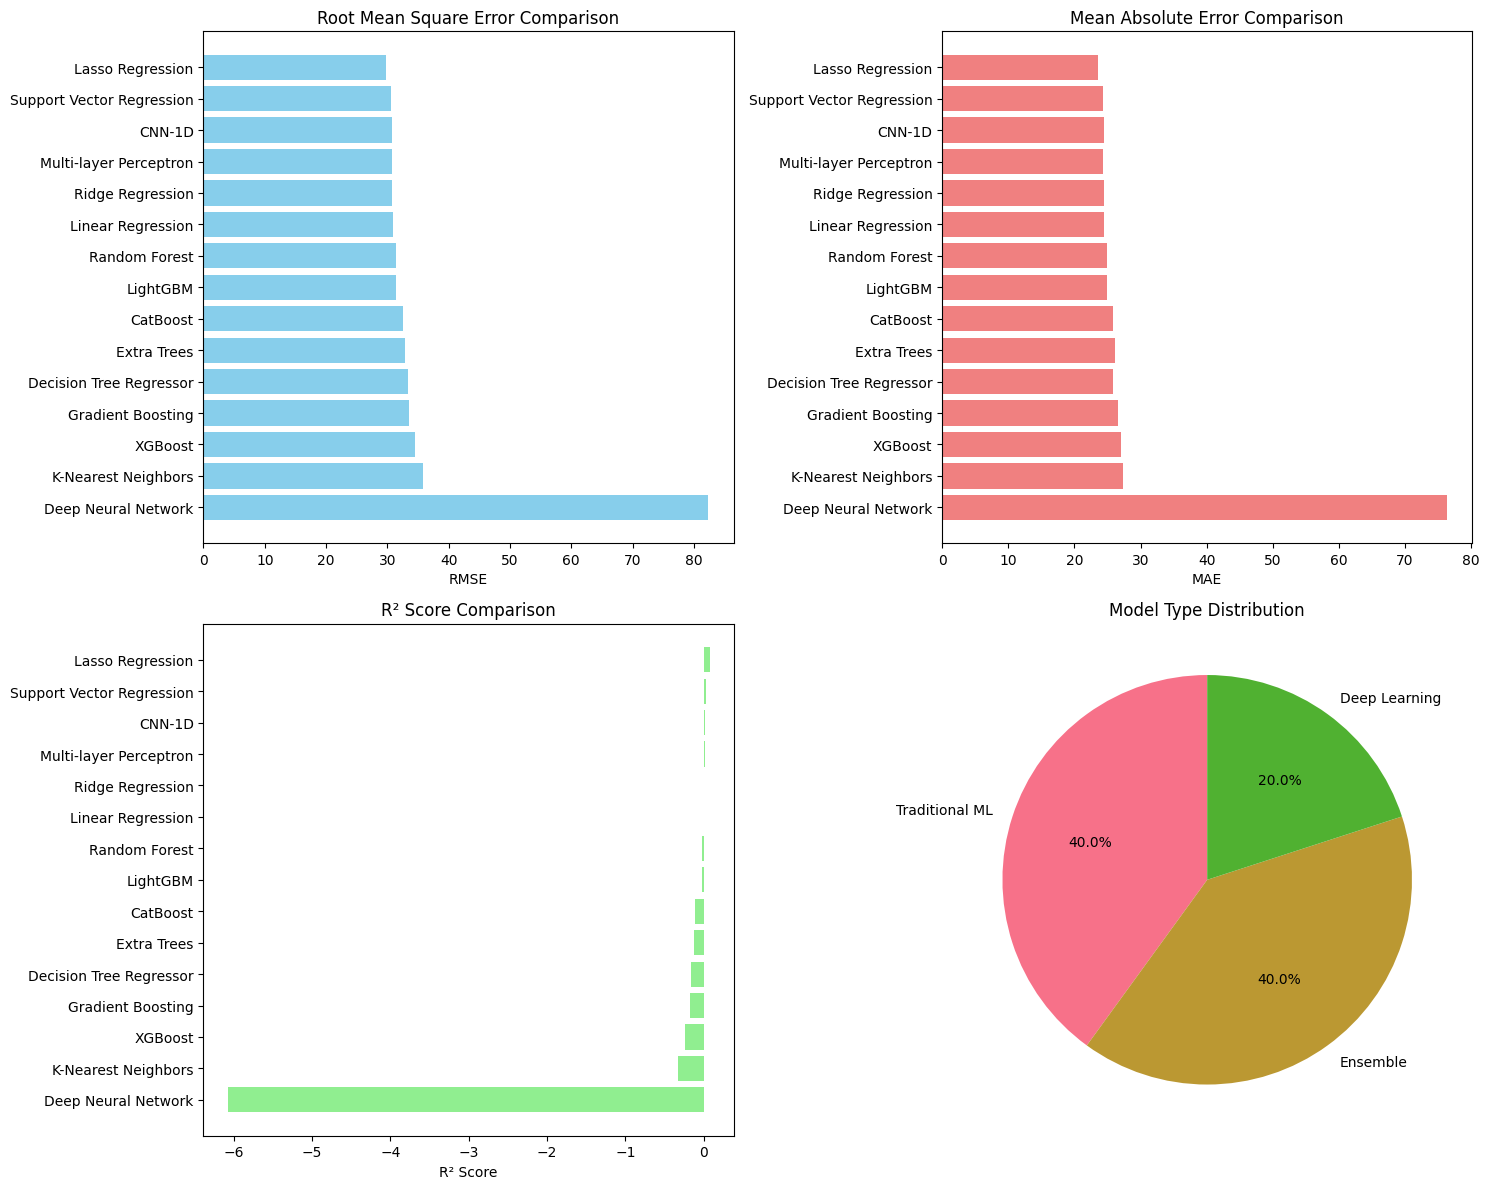


Results saved to: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\model_comparison_20251113_144655.csv


In [15]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# RMSE comparison
axes[0, 0].barh(results_df['model_name'], results_df['rmse'], color='skyblue')
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].set_title('Root Mean Square Error Comparison')
axes[0, 0].invert_yaxis()

# MAE comparison
axes[0, 1].barh(results_df['model_name'], results_df['mae'], color='lightcoral')
axes[0, 1].set_xlabel('MAE')
axes[0, 1].set_title('Mean Absolute Error Comparison')
axes[0, 1].invert_yaxis()

# R² comparison
axes[1, 0].barh(results_df['model_name'], results_df['r2'], color='lightgreen')
axes[1, 0].set_xlabel('R² Score')
axes[1, 0].set_title('R² Score Comparison')
axes[1, 0].invert_yaxis()

# Model type distribution
model_types = []
for model_name in results_df['model_name']:
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression', 'Decision Tree Regressor', 'K-Nearest Neighbors']:
        model_types.append('Traditional ML')
    elif model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Extra Trees']:
        model_types.append('Ensemble')
    else:
        model_types.append('Deep Learning')

type_counts = pd.Series(model_types).value_counts()
axes[1, 1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Model Type Distribution')

plt.tight_layout()
plt.show()

# Save results to CSV
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_path = os.path.join(MODEL_BASE_PATH, f"model_comparison_{timestamp}.csv")
results_df.to_csv(results_path, index=False)
print(f"\nResults saved to: {results_path}")

## 9. Feature Importance Analysis

Feature Importance Analysis:

Top 10 Most Important Features (Random Forest):
                 feature  importance
2   check_in_day_of_week    0.412217
8  check_in_week_of_year    0.205455
3                 season    0.193418
4             is_weekend    0.150924
1         check_in_month    0.030159
7          check_in_year    0.004920
0          stay_duration    0.002907
5                 locale    0.000000
6               currency    0.000000


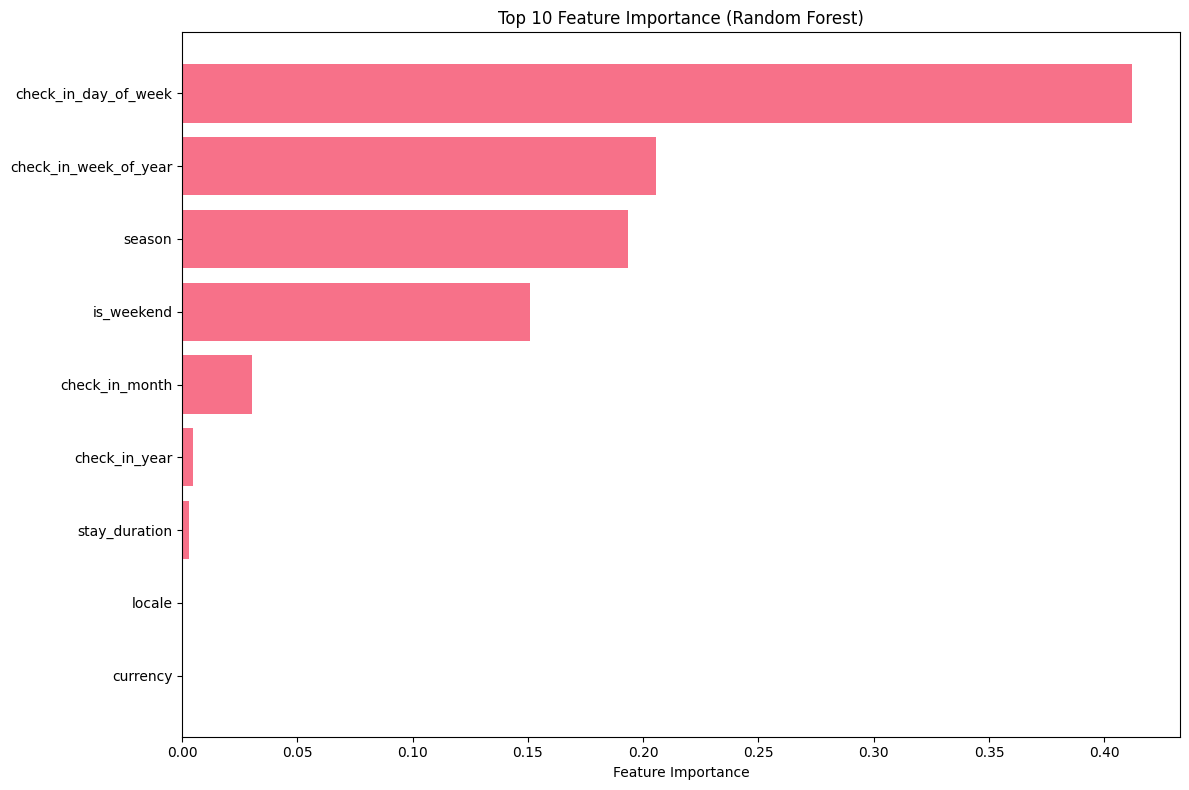


Feature importance saved to: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\feature_importance_20251113_144655.csv


In [16]:
# Feature importance for tree-based models
print("Feature Importance Analysis:")
print("=" * 50)

# Get feature importance from Random Forest (best tree-based model)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save feature importance
feature_importance_path = os.path.join(MODEL_BASE_PATH, f"feature_importance_{timestamp}.csv")
feature_importance.to_csv(feature_importance_path, index=False)
print(f"\nFeature importance saved to: {feature_importance_path}")

## 10. Model Deployment Preparation

In [18]:
# Create a model registry file for easy access in the dashboard
model_registry = {
    'best_model': {
        'name': results_df.iloc[0]['model_name'],
        'metrics': results_df.iloc[0].to_dict(),
        'timestamp': timestamp
    },
    'all_models': results_df.to_dict('records'),
    'feature_columns': feature_cols,
    'target_column': target_col,
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'dataset_info': {
        'total_samples': len(df),
        'train_samples': len(X_train),
        'val_samples': len(X_val),
        'test_samples': len(X_test),
        'n_features': len(feature_cols)
    },
    'training_timestamp': timestamp
}

registry_path = os.path.join(MODEL_BASE_PATH, "model_registry.json")
with open(registry_path, 'w') as f:
    json.dump(model_registry, f, indent=2)

print(f"Model registry created: {registry_path}")

# Create a simple model loader utility
loader_code = '''import joblib
import json
import os
import numpy as np

class ModelLoader:
    def __init__(self, model_base_path):
        self.model_base_path = model_base_path
        self.registry_path = os.path.join(model_base_path, "model_registry.json")
        self.load_registry()
    
    def load_registry(self):
        with open(self.registry_path, 'r') as f:
            self.registry = json.load(f)
    
    def get_best_model(self):
        best_model_info = self.registry['best_model']
        return best_model_info
    
    def load_model_by_name(self, model_name):
        # Implementation for loading specific models
        # This would be expanded based on the specific model type
        pass
    
    def get_feature_info(self):
        return {
            'features': self.registry['feature_columns'],
            'categorical': self.registry['categorical_features'],
            'numerical': self.registry['numerical_features']
        }
'''

# Save model loader utility
loader_path = os.path.join(MODEL_BASE_PATH, "model_loader.py")
with open(loader_path, 'w') as f:
    f.write(loader_code)

print(f"Model loader utility created: {loader_path}")

print("\n" + "=" * 80)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 80)
print(f"Total models trained: {len(model_results)}")
print(f"Best performing model: {results_df.iloc[0]['model_name']}")
print(f"Best R² score: {results_df.iloc[0]['r2']:.4f}")
print(f"\nModels saved in organized folders:")
print(f"- Traditional ML: {os.path.join(MODEL_BASE_PATH, 'traditional_ml')}")
print(f"- Ensemble Models: {os.path.join(MODEL_BASE_PATH, 'ensemble_models')}")
print(f"- Deep Learning: {os.path.join(MODEL_BASE_PATH, 'deep_learning')}")
print(f"- Model Artifacts: {os.path.join(MODEL_BASE_PATH, 'model_artifacts')}")
print(f"\nModel registry: {registry_path}")
print(f"Results comparison: {results_path}")
print(f"Feature importance: {feature_importance_path}")

Model registry created: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\model_registry.json
Model loader utility created: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\model_loader.py

MODEL TRAINING COMPLETED SUCCESSFULLY!
Total models trained: 15
Best performing model: Lasso Regression
Best R² score: 0.0740

Models saved in organized folders:
- Traditional ML: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\traditional_ml
- Ensemble Models: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-ML-Dashboard\ml_models\ensemble_models
- Deep Learning: c:\Users\proda\OneDrive\Documents\Gus Agung\PROJECT ISENG\PROJECT AFTER LULUS\GYE-Project\GYE-OTA-ANALYSIS\Airbnb-